In [1]:
import pandas as pd
import os
from matplotlib import pyplot as plt
import math
import numpy as np

In [2]:
cities = {}
directory = 'Data'
for filename in os.listdir(directory):
    filepath = os.path.join(directory, filename)
    basename,_ = os.path.splitext(filename)
    cities[basename] = pd.read_csv(filepath)
    

In [4]:
cities_names = cities.keys()
cities_names

dict_keys(['berlin_weekdays', 'berlin_weekends', 'london_weekdays', 'barcelona_weekdays', 'rome_weekdays', 'athens_weekends', 'barcelona_weekends', 'paris_weekends', 'budapest_weekdays', 'amsterdam_weekdays', 'athens_weekdays', 'lisbon_weekdays', 'vienna_weekdays', 'vienna_weekends', 'budapest_weekends', 'rome_weekends', 'london_weekends', 'amsterdam_weekends', 'paris_weekdays', 'lisbon_weekends'])

In [5]:
cities['berlin_weekdays'].head()

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,0,185.799757,Private room,False,True,2.0,True,0,0,10.0,98.0,1,3.582211,0.174706,105.063708,16.019042,148.941114,30.710638,13.42344,52.49150
1,1,194.914462,Private room,False,True,5.0,False,0,1,9.0,86.0,1,3.525410,0.511922,75.339529,11.487002,106.442356,21.947685,13.46800,52.51900
2,2,176.217631,Private room,False,True,2.0,False,0,0,9.0,91.0,1,3.801713,0.281397,73.669176,11.232324,105.440205,21.741048,13.47096,52.51527
3,3,207.768533,Private room,False,True,3.0,True,0,0,10.0,97.0,1,0.982408,0.705573,133.187409,20.307057,198.233362,40.874362,13.42281,52.53139
4,4,150.743199,Private room,False,True,2.0,False,0,0,10.0,99.0,1,8.869697,2.187188,39.860151,6.077469,50.996308,10.515090,13.52440,52.47842


In [6]:
cities['berlin_weekdays'].shape

(1284, 20)

Let us check if all the files have the same structure

In [7]:
for city, data in cities.items():
    print(data.shape)

(1284, 20)
(1200, 20)
(4614, 20)
(1555, 20)
(4492, 20)
(2627, 20)
(1278, 20)
(3558, 20)
(2074, 20)
(1103, 20)
(2653, 20)
(2857, 20)
(1738, 20)
(1799, 20)
(1948, 20)
(4535, 20)
(5379, 20)
(977, 20)
(3130, 20)
(2906, 20)


Merging the files into one dataframe and adding two colmuns city and period(weekdays:0,weekend:1)

In [8]:
columns = cities['berlin_weekdays'].columns.tolist()
columns

['Unnamed: 0',
 'realSum',
 'room_type',
 'room_shared',
 'room_private',
 'person_capacity',
 'host_is_superhost',
 'multi',
 'biz',
 'cleanliness_rating',
 'guest_satisfaction_overall',
 'bedrooms',
 'dist',
 'metro_dist',
 'attr_index',
 'attr_index_norm',
 'rest_index',
 'rest_index_norm',
 'lng',
 'lat']

In [9]:
columns.append('name')
columns.append('period')

['Unnamed: 0',
 'realSum',
 'room_type',
 'room_shared',
 'room_private',
 'person_capacity',
 'host_is_superhost',
 'multi',
 'biz',
 'cleanliness_rating',
 'guest_satisfaction_overall',
 'bedrooms',
 'dist',
 'metro_dist',
 'attr_index',
 'attr_index_norm',
 'rest_index',
 'rest_index_norm',
 'lng',
 'lat',
 'name',
 'period']

In [10]:
df = pd.DataFrame(columns = columns)

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,...,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,name,period


In [11]:
for city, city_df in cities.items():
    name_period = city.split('_')
    period = 0
    if name_period[1] == 'weekends':
        period = 1
    name = name_period[0]
    rows = city_df.shape[0]
    city_df['city'] = pd.Series([name]*rows)
    city_df['period'] = pd.Series([period]*rows)
    df = pd.concat([df,city_df], sort=False)
df

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,...,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,name,period,city
0,0,185.799757,Private room,False,True,2.0,True,0,0,10.0,...,0.174706,105.063708,16.019042,148.941114,30.710638,13.42344,52.4915,NaN,0,berlin
1,1,194.914462,Private room,False,True,5.0,False,0,1,9.0,...,0.511922,75.339529,11.487002,106.442356,21.947685,13.468,52.519,NaN,0,berlin
2,2,176.217631,Private room,False,True,2.0,False,0,0,9.0,...,0.281397,73.669176,11.232324,105.440205,21.741048,13.47096,52.51527,NaN,0,berlin
3,3,207.768533,Private room,False,True,3.0,True,0,0,10.0,...,0.705573,133.187409,20.307057,198.233362,40.874362,13.42281,52.53139,NaN,0,berlin
4,4,150.743199,Private room,False,True,2.0,False,0,0,10.0,...,2.187188,39.860151,6.077469,50.996308,10.51509,13.5244,52.47842,NaN,0,berlin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2901,2901,191.135084,Entire home/apt,False,False,3.0,False,0,1,6.0,...,0.231945,159.688261,5.267041,443.248443,24.911735,-9.13614,38.72451,NaN,1,lisbon
2902,2902,326.454034,Entire home/apt,False,False,4.0,True,0,1,10.0,...,0.169451,259.657447,8.564351,661.68818,37.188626,-9.13599,38.71831,NaN,1,lisbon
2903,2903,337.007505,Entire home/apt,False,False,4.0,True,0,1,10.0,...,0.19893,270.787715,8.931464,621.140954,34.909764,-9.134,38.718,NaN,1,lisbon
2904,2904,390.478424,Entire home/apt,False,False,2.0,True,0,0,10.0,...,0.142999,266.045337,8.775045,666.49662,37.458873,-9.13598,38.71807,NaN,1,lisbon


In [12]:
df = df.drop('Unnamed: 0',axis=1)
df

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,...,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,name,period,city
0,185.799757,Private room,False,True,2.0,True,0,0,10.0,98.0,...,0.174706,105.063708,16.019042,148.941114,30.710638,13.42344,52.4915,NaN,0,berlin
1,194.914462,Private room,False,True,5.0,False,0,1,9.0,86.0,...,0.511922,75.339529,11.487002,106.442356,21.947685,13.468,52.519,NaN,0,berlin
2,176.217631,Private room,False,True,2.0,False,0,0,9.0,91.0,...,0.281397,73.669176,11.232324,105.440205,21.741048,13.47096,52.51527,NaN,0,berlin
3,207.768533,Private room,False,True,3.0,True,0,0,10.0,97.0,...,0.705573,133.187409,20.307057,198.233362,40.874362,13.42281,52.53139,NaN,0,berlin
4,150.743199,Private room,False,True,2.0,False,0,0,10.0,99.0,...,2.187188,39.860151,6.077469,50.996308,10.51509,13.5244,52.47842,NaN,0,berlin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2901,191.135084,Entire home/apt,False,False,3.0,False,0,1,6.0,80.0,...,0.231945,159.688261,5.267041,443.248443,24.911735,-9.13614,38.72451,NaN,1,lisbon
2902,326.454034,Entire home/apt,False,False,4.0,True,0,1,10.0,100.0,...,0.169451,259.657447,8.564351,661.68818,37.188626,-9.13599,38.71831,NaN,1,lisbon
2903,337.007505,Entire home/apt,False,False,4.0,True,0,1,10.0,96.0,...,0.19893,270.787715,8.931464,621.140954,34.909764,-9.134,38.718,NaN,1,lisbon
2904,390.478424,Entire home/apt,False,False,2.0,True,0,0,10.0,100.0,...,0.142999,266.045337,8.775045,666.49662,37.458873,-9.13598,38.71807,NaN,1,lisbon


In [13]:
df.describe()

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,...,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,name,period,city
count,51707.000000,51707,51707,51707,51707.0,51707,51707,51707,51707.0,51707.0,...,51707.000000,51707.000000,51707.0,51707.000000,51707.0,51707.000,51707.000,0,51707,51707
unique,10497.000000,3,2,2,5.0,2,2,2,9.0,53.0,...,51707.000000,51707.000000,51688.0,51707.000000,51688.0,23600.000,21484.000,0,2,10
top,184.462161,Entire home/apt,False,False,2.0,False,0,0,10.0,100.0,...,0.174706,105.063708,100.0,148.941114,100.0,12.472,38.711,NaN,1,london
freq,188.000000,32648,51341,33014,24333.0,38475,36642,33599,30067.0,10681.0,...,1.000000,1.000000,20.0,1.000000,20.0,98.000,136.000,NaN,26207,9993


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51707 entries, 0 to 2905
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   realSum                     51707 non-null  object
 1   room_type                   51707 non-null  object
 2   room_shared                 51707 non-null  object
 3   room_private                51707 non-null  object
 4   person_capacity             51707 non-null  object
 5   host_is_superhost           51707 non-null  object
 6   multi                       51707 non-null  object
 7   biz                         51707 non-null  object
 8   cleanliness_rating          51707 non-null  object
 9   guest_satisfaction_overall  51707 non-null  object
 10  bedrooms                    51707 non-null  object
 11  dist                        51707 non-null  object
 12  metro_dist                  51707 non-null  object
 13  attr_index                  51707 non-null  obj

In [15]:
df['name']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
2901    NaN
2902    NaN
2903    NaN
2904    NaN
2905    NaN
Name: name, Length: 51707, dtype: object

In [16]:
df=df.drop('name',axis=1)

In [17]:
object_cols = ["room_type","room_shared","room_private","host_is_superhost","city","name"]

In [18]:
columns.remove('Unnamed: 0')

In [19]:
numerical_cols = [item for item in columns if item not in object_cols]
numerical_cols

['realSum',
 'person_capacity',
 'multi',
 'biz',
 'cleanliness_rating',
 'guest_satisfaction_overall',
 'bedrooms',
 'dist',
 'metro_dist',
 'attr_index',
 'attr_index_norm',
 'rest_index',
 'rest_index_norm',
 'lng',
 'lat',
 'period']

# Numerical columns study

In [20]:
for col in numerical_cols:
    df[col] = df[col].astype(float)
df_numerical = df.loc[:,numerical_cols]
df_numerical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51707 entries, 0 to 2905
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   realSum                     51707 non-null  float64
 1   person_capacity             51707 non-null  float64
 2   multi                       51707 non-null  float64
 3   biz                         51707 non-null  float64
 4   cleanliness_rating          51707 non-null  float64
 5   guest_satisfaction_overall  51707 non-null  float64
 6   bedrooms                    51707 non-null  float64
 7   dist                        51707 non-null  float64
 8   metro_dist                  51707 non-null  float64
 9   attr_index                  51707 non-null  float64
 10  attr_index_norm             51707 non-null  float64
 11  rest_index                  51707 non-null  float64
 12  rest_index_norm             51707 non-null  float64
 13  lng                         5170

In [21]:
df_numerical.head()

,realSum,person_capacity,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,period
0,185.799757,2.0,0.0,0.0,10.0,98.0,1.0,3.582211,0.174706,105.063708,16.019042,148.941114,30.710638,13.42344,52.49150,0.0
1,194.914462,5.0,0.0,1.0,9.0,86.0,1.0,3.525410,0.511922,75.339529,11.487002,106.442356,21.947685,13.46800,52.51900,0.0
2,176.217631,2.0,0.0,0.0,9.0,91.0,1.0,3.801713,0.281397,73.669176,11.232324,105.440205,21.741048,13.47096,52.51527,0.0
3,207.768533,3.0,0.0,0.0,10.0,97.0,1.0,0.982408,0.705573,133.187409,20.307057,198.233362,40.874362,13.42281,52.53139,0.0
4,150.743199,2.0,0.0,0.0,10.0,99.0,1.0,8.869697,2.187188,39.860151,6.077469,50.996308,10.515090,13.52440,52.47842,0.0


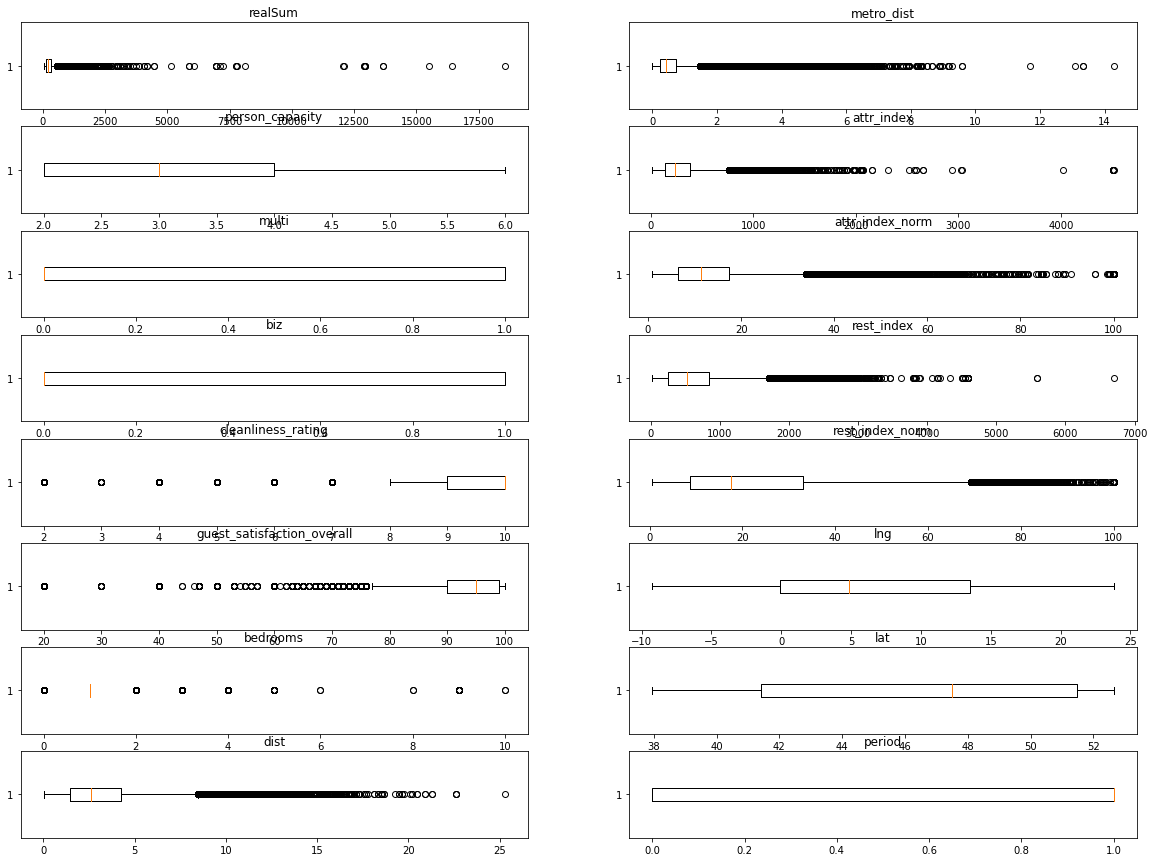

In [22]:
nb_rows = math.floor(len(df_numerical.columns)/2)
nb_rows = nb_rows + 1 if len(df_numerical.columns)%2 > 0 else nb_rows
nb_rows = int(nb_rows)
fig, axes = plt.subplots(nrows = nb_rows,ncols=2,figsize=(20,15))
current_col = 0
for col in range(0,2):
    for row in range(0,nb_rows):
        if current_col < len(numerical_cols):
            axes[row,col].boxplot(df_numerical[numerical_cols[current_col]],vert=False)
            axes[row,col].set_title(numerical_cols[current_col])
        current_col = current_col+1
    
plt.show()

In [ ]:
def detect_outliers(label=None):
    #todo
    pass

def assign_mean(df_out, not_df_out, label=None):
    #todo
    pass

def delete_outliers(df_out):
    #todo: return the new df with the outliers rows removed
    pass